#Model Training

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score

In [69]:
df=pd.read_csv("df_final.csv")

In [70]:
df.head()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,1/1/2005,2.7,160.130,5.7100,162.3370,166.8,2139.0,5.056246,294768.0,8131.632497,...,1302.0,12767.286,69.2,2144.0,7095.0,65.8,932.1,4.4,5.3,232500.0
1,2/1/2005,2.3,161.924,5.6275,166.6182,168.8,2114.0,5.091293,294955.0,8215.532983,...,1322.0,12767.286,69.2,2207.0,7153.0,65.9,938.0,4.3,5.4,232500.0
2,3/1/2005,2.5,164.576,5.9280,164.5840,169.0,2062.0,5.076423,295149.0,7584.942467,...,1311.0,12767.286,69.2,1864.0,7181.0,65.9,942.5,4.1,5.2,232500.0
3,4/1/2005,2.1,166.999,5.8550,160.4395,171.8,2150.0,5.101085,295359.0,8315.365367,...,1324.0,12922.656,68.7,2061.0,7266.0,66.1,947.9,4.3,5.2,233700.0
4,5/1/2005,2.6,169.544,5.7200,164.6264,172.2,2085.0,5.101085,295582.0,9250.194258,...,1322.0,12922.656,68.7,2025.0,7294.0,66.1,953.0,4.2,5.1,233700.0


In [71]:
# Drop rows with any missing (NaN) values
df = df.dropna()

#Data splitting and Scaling

In [72]:
X=df.drop(columns=['DATE','target'],axis=1)
y=df.target

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=49)

In [74]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Model Training

#Linear Regression

In [75]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(x_train,y_train)

LinearRegression()

In [76]:
LinearRegression_model_predict=LinearRegression_model.predict(x_test)

#Checking Accuracy of Linear Regression

In [77]:
mse = mean_squared_error(y_test, LinearRegression_model_predict)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, LinearRegression_model_predict)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 16.67
RMSE: 4.082525
R-squared (R2): 0.99


#Predicted vs Observed

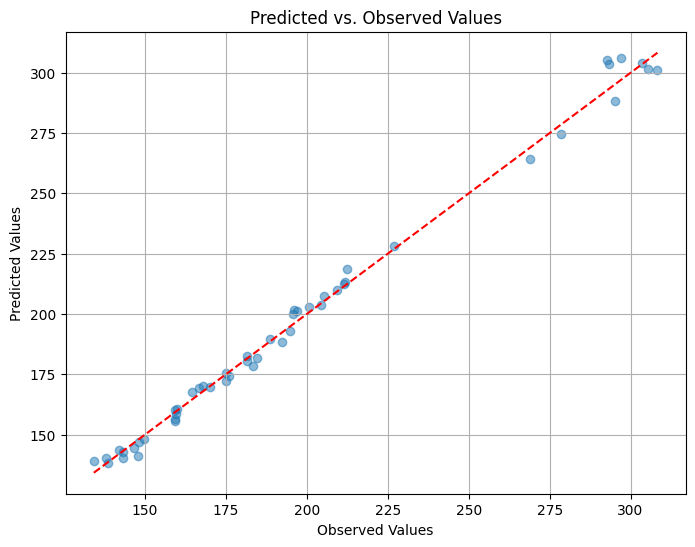

In [78]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, LinearRegression_model_predict, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()


#Ridge Regression

In [79]:
Ridge_model=Ridge()
Ridge_model.fit(x_train,y_train)

Ridge()

In [80]:
Ridge_model_predict=Ridge_model.predict(x_test)

In [81]:
mse = mean_squared_error(y_test, Ridge_model_predict)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, Ridge_model_predict)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 19.46
RMSE: 4.411480
R-squared (R2): 0.99


#Predicted V/S Observed

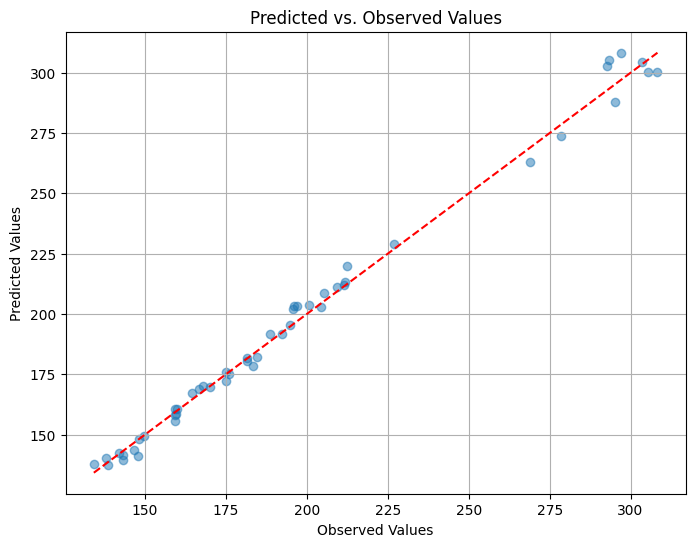

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, Ridge_model_predict, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

#Lasso Regression

In [83]:
Lasso_model=Lasso()
Lasso_model.fit(x_train,y_train)

Lasso()

In [84]:
Lasso_model_predict=Ridge_model.predict(x_test)


In [85]:
mse = mean_squared_error(y_test, LinearRegression_model_predict)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, Lasso_model_predict)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 16.67
RMSE: 4.082525
R-squared (R2): 0.99


#Predicted V/S Observed

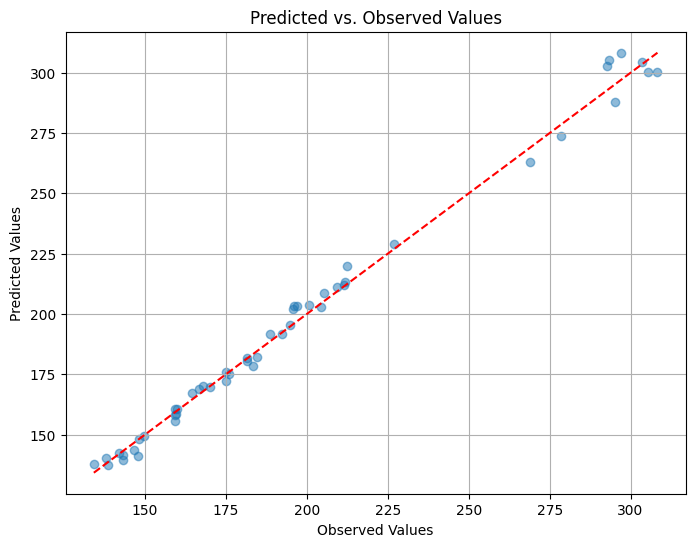

In [86]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, Lasso_model_predict, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

#Cross Validation

#Linear Regression

In [87]:
cross_val_scores = cross_val_score(LinearRegression_model, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99254951 0.98689198 0.99181127 0.99615224 0.99528525]


#Ridge Regression Model

In [88]:
cross_val_scores = cross_val_score(Ridge_model, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99416915 0.98869316 0.99345842 0.99527282 0.99436547]


#Lasso Regression Model

In [89]:
cross_val_scores = cross_val_score(Lasso_model, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99084521 0.98984326 0.99086286 0.99254    0.98980428]


#Most Prominent features and least prominent features

In [93]:
# coefficients and corresponding feature names
lasso_coefficients = Lasso_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [94]:
non_zero_coefficients_df

,Feature,Coefficient
1,mortgage_rate,1.198471
3,PPI_Cement,8.962711
5,PPI_Concrete,0.123085
10,new_private_hw_under,12.228339
11,GDP,14.945374
12,home_ow_rate,7.960737
17,monthly_supply,0.277928
19,MSPUS,21.202915


In [95]:
zero_coefficients_df

,Feature,Coefficient
0,p_saving_rate,-0.0
2,IPI_Cement,-0.0
4,permit,0.0
6,population,0.0
7,new_private_house,0.0
8,emratio,0.0
9,income,0.0
13,house_st,0.0
14,total_emp_cons,0.0
15,labor_percent,0.0
